In [1]:
import pandas as pd
import numpy as np
from   tabulate import tabulate
from   sklearn.model_selection import train_test_split
from   sklearn.compose import ColumnTransformer
from   sklearn.pipeline import Pipeline
from   sklearn.preprocessing import OneHotEncoder, StandardScaler
from   sklearn.linear_model import LogisticRegression

import shap

In [2]:
X, y = shap.datasets.adult()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
cats = ['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
nums = ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']

In [4]:
preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(),  cats),
                                                 ('num', StandardScaler(), nums)])
model = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=10000))])

In [5]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Workclass',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Education-Num',
                                                   'Capital Gain',
                                                   'Capital Loss',
                                                   'Hours per week'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [6]:
X_sub = shap.sample(X_train, 1000)
ex = shap.Explainer(model.predict_proba, X_sub)
shap_values = ex(X_test.iloc[0:100])

PermutationExplainer explainer: 101it [00:19,  3.99it/s]                         


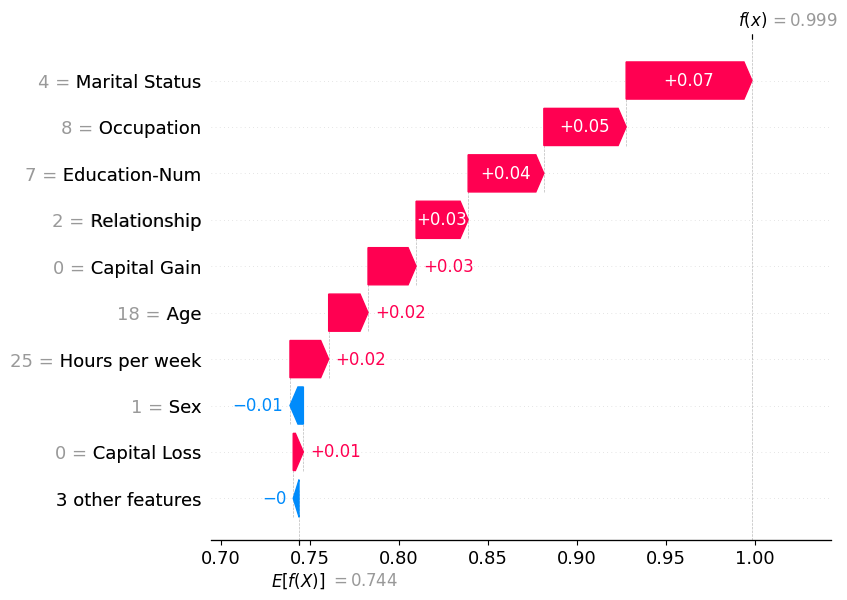

In [11]:
class_index, data_index = 0, 1
shap.plots.waterfall(shap_values[data_index, :, class_index])

In [12]:
shap.initjs()
shap.plots.force(shap_values[data_index, :, class_index])

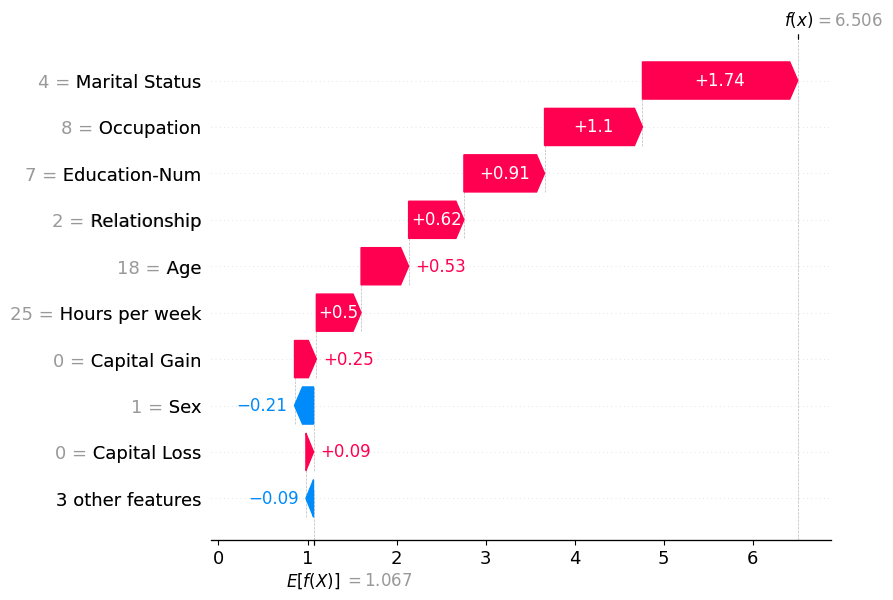

In [13]:
ex_logit = shap.Explainer(model.predict_proba, X_sub, link=shap.links.logit)
sv_logit = ex_logit(X_test.iloc[0:100])
shap.plots.waterfall(sv_logit[data_index, :, class_index])

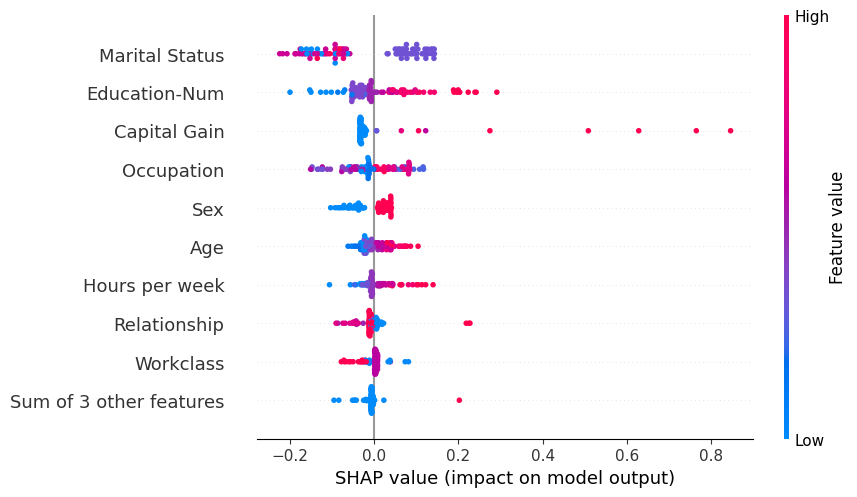

In [34]:
shap.plots.beeswarm(shap_values[:, :, class_index])

In [37]:
shap.plots.force(sv_logit[0:40, :, class_index])

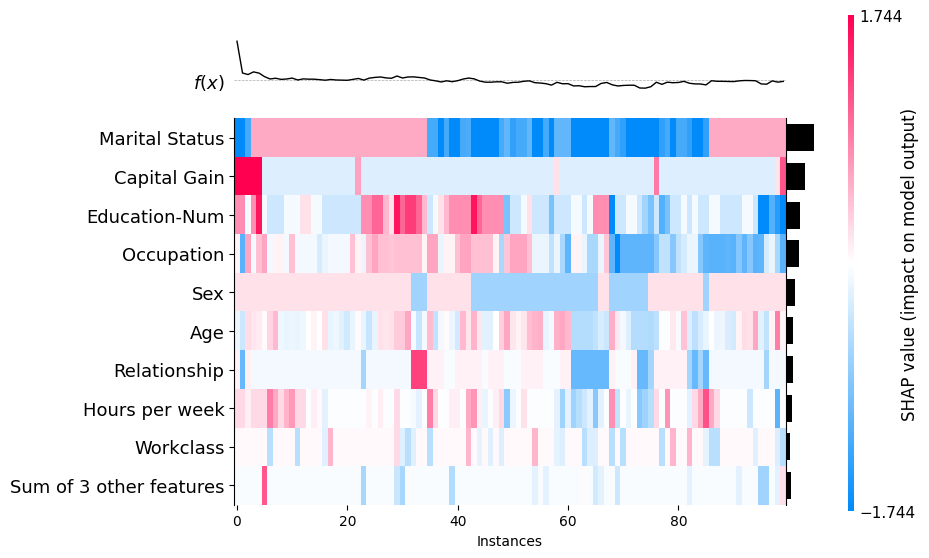

<Axes: xlabel='Instances'>

In [39]:
shap.plots.heatmap(sv_logit[:, :, class_index])